!pip install metis

In [1]:
import numpy as np
import networkx as nx
import metis
import matplotlib.pyplot as plt

In [2]:
def get_conductance(path):
    # returns the conductance obtained by metis
    
    edge_list = np.loadtxt(path, skiprows=1)
    flip_graph = nx.Graph(list(edge_list))
    
    (edgecuts, parts) = metis.part_graph(flip_graph)
    part_size = sum(parts)
    
    return edgecuts / min(part_size, len(parts) - part_size)

In [3]:
convex_conductances = [get_conductance("./instances/convex-" + str(i) + "/edge-list") for i in range(5, 16)]

In [4]:
convex_conductances

[1.0,
 0.7142857142857143,
 0.7619047619047619,
 0.7230769230769231,
 0.6124401913875598,
 0.4794908062234795,
 0.5152542372881356,
 0.4098242234529256,
 0.40707296137339055,
 0.40163514578408194,
 0.3872786092412261]

In [5]:
uniform_conductances = [1.] + [get_conductance("./instances/uniform-" + str(i) + "/edge-list") for i in range(6, 16)]
# for some reason metis does something weird for uniform-5

In [6]:
uniform_conductances

[1.0,
 0.6666666666666666,
 0.6923076923076923,
 0.6451612903225806,
 0.44086021505376344,
 0.5547445255474452,
 0.5757918552036199,
 0.4694868238557559,
 0.5156172196822235,
 0.4707296979394355,
 0.43962852922447165]

In [7]:
coeffs_convex = np.polyfit(np.arange(5, 16), 1 / np.array(convex_conductances), 1)
coeffs_convex

array([0.16476579, 0.23626952])

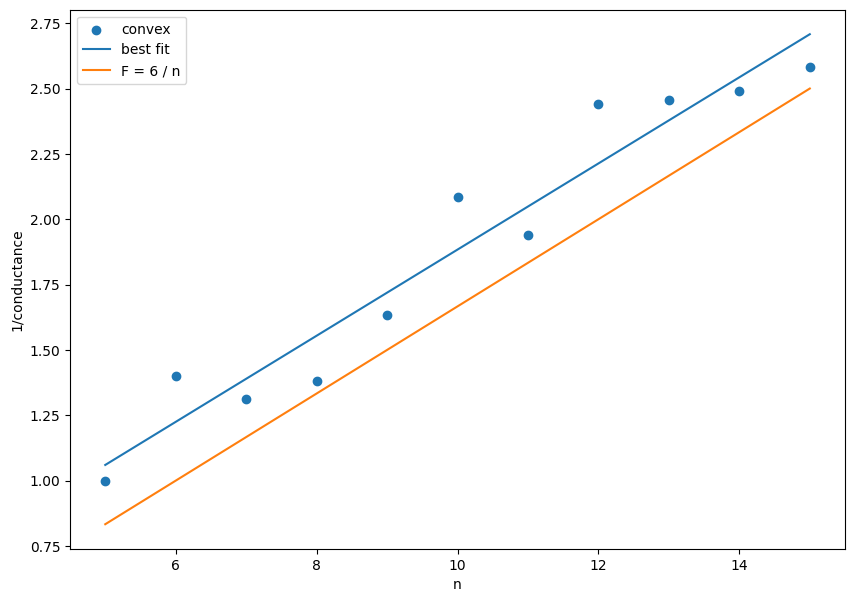

In [18]:
plt.figure(figsize=(10, 7))
plt.xlabel('n')
plt.ylabel('1/conductance')
plt.scatter(np.arange(5, 16), 1 / np.array(convex_conductances), label='convex')
plt.plot(np.arange(5, 16), coeffs_convex[0] * np.arange(5, 16) + coeffs_convex[1], label='best fit')
plt.plot(np.arange(5, 16), np.arange(5, 16) / 6, label='F = 6 / n')
# plt.plot(np.arange(5, 16), np.sqrt(np.arange(5, 16)) / 0.1508, label='F = 0.1508 / sqrt(n)')
plt.legend();

In [9]:
coeffs_uniform = np.polyfit(np.arange(5, 16), 1 / np.array(uniform_conductances), 1)
coeffs_uniform

array([0.09985488, 0.79877166])

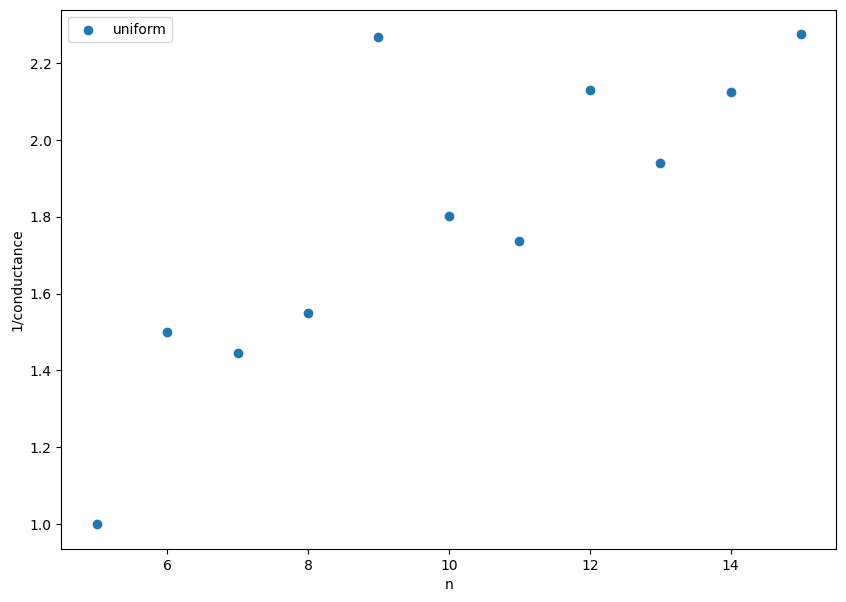

In [10]:
plt.figure(figsize=(10, 7))
plt.xlabel('n')
plt.ylabel('1/conductance')
plt.scatter(np.arange(5, 16), 1 / np.array(uniform_conductances), label='uniform')
#plt.plot(np.arange(5, 16), coeffs_uniform[0] * np.arange(5, 16) + coeffs_uniform[1])
#plt.plot(np.arange(5, 16), np.arange(5, 16) / 6, label='n/6')
plt.legend();

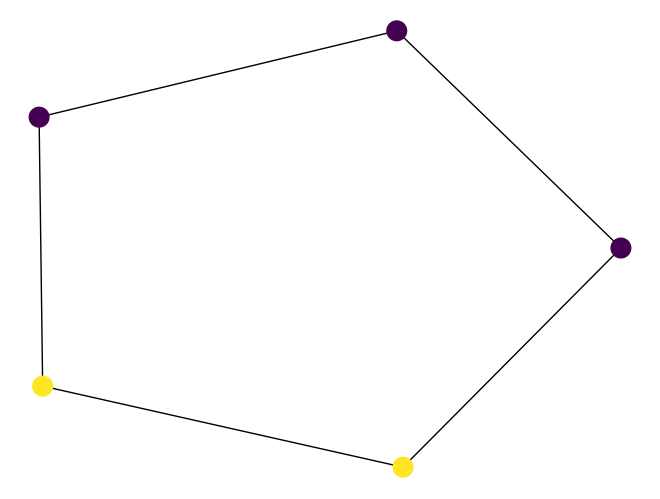

In [11]:
edge_list = np.loadtxt("./instances/convex-5/edge-list", skiprows=1)
flip_graph = nx.Graph(list(edge_list))
(edgecuts, parts) = metis.part_graph(flip_graph)
nx.draw_spring(flip_graph, node_color=parts, node_size=200)
plt.savefig("./figures/convex-5-graph.png")

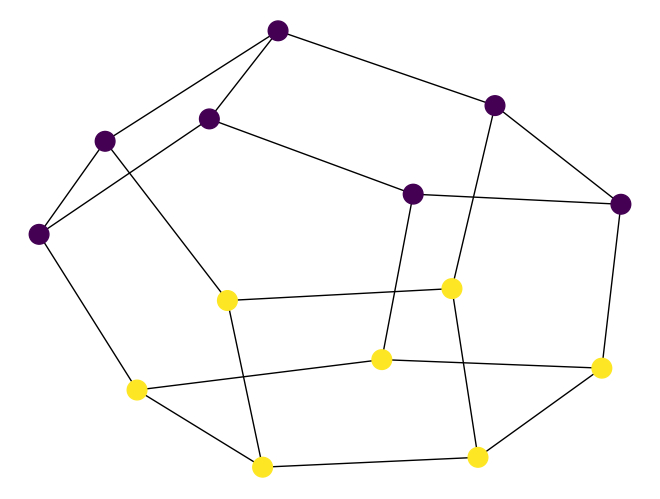

In [12]:
edge_list = np.loadtxt("./instances/convex-6/edge-list", skiprows=1)
flip_graph = nx.Graph(list(edge_list))
(edgecuts, parts) = metis.part_graph(flip_graph)
nx.draw_spring(flip_graph, node_color=parts, node_size=200)
plt.savefig("./figures/convex-6-graph.png")

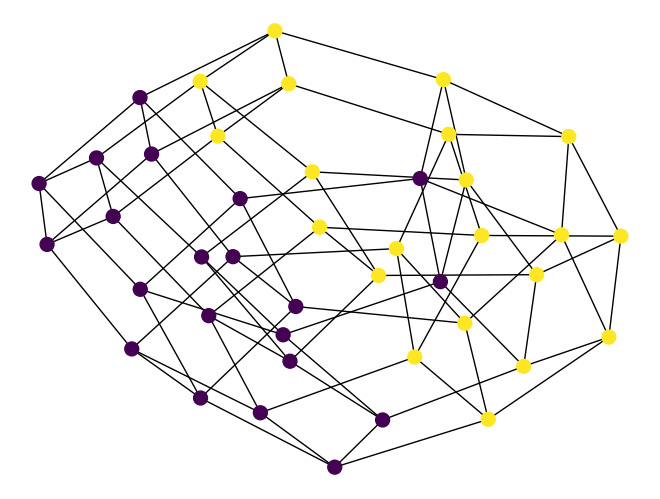

In [13]:
edge_list = np.loadtxt("./instances/convex-7/edge-list", skiprows=1)
flip_graph = nx.Graph(list(edge_list))
(edgecuts, parts) = metis.part_graph(flip_graph)
nx.draw_spring(flip_graph, node_color=parts, node_size=100)
plt.savefig("./figures/convex-7-graph.png")

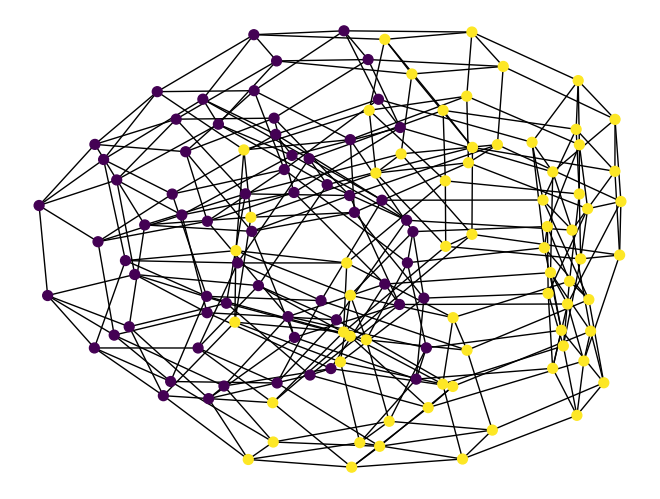

In [14]:
edge_list = np.loadtxt("./instances/convex-8/edge-list", skiprows=1)
flip_graph = nx.Graph(list(edge_list))
(edgecuts, parts) = metis.part_graph(flip_graph)
nx.draw_spring(flip_graph, node_color=parts, node_size=50)
plt.savefig("./figures/convex-8-graph.png")

In [15]:
edge_list = np.loadtxt("./instances/convex-13/edge-list", skiprows=1)
flip_graph = nx.Graph(list(edge_list))
(edgecuts, parts) = metis.part_graph(flip_graph)
print(sum(parts), len(parts) - sum(parts))

29125 29661
